# Choose features

## Casual imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Unzip files

In [2]:
!unzip data/original.zip -d data/

Archive:  data/original.zip
   creating: data/original/
  inflating: data/original/Kickstarter040.csv  
  inflating: data/original/Kickstarter054.csv  
  inflating: data/original/Kickstarter055.csv  
  inflating: data/original/Kickstarter041.csv  
  inflating: data/original/Kickstarter043.csv  
  inflating: data/original/Kickstarter042.csv  
  inflating: data/original/Kickstarter052.csv  
  inflating: data/original/Kickstarter046.csv  
  inflating: data/original/Kickstarter047.csv  
  inflating: data/original/Kickstarter053.csv  
  inflating: data/original/Kickstarter045.csv  
  inflating: data/original/Kickstarter051.csv  
  inflating: data/original/Kickstarter050.csv  
  inflating: data/original/Kickstarter044.csv  
  inflating: data/original/Kickstarter023.csv  
  inflating: data/original/Kickstarter037.csv  
  inflating: data/original/Kickstarter036.csv  
  inflating: data/original/Kickstarter022.csv  
  inflating: data/original/Kickstarter008.csv  
  inflating: data/original/Kicks

## Import dataset

In [3]:
import glob
path = 'data/original/'
all_files = glob.glob(path + '*.csv')
# list to append csvs
l = []
# loop over all files
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    l.append(df)

# Add all data frames together
full_df = pd.concat(l, axis=0, ignore_index=True)

# Remove unziped folder

In [4]:
!rm -r data/original

In [5]:
full_df.head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,315,Babalus Shoes,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",28645,US,1541459205,"{""id"":2094277840,""name"":""Lucy Conroy"",""slug"":""...",USD,$,True,...,babalus-childrens-shoes,https://www.kickstarter.com/discover/categorie...,False,False,live,1548223375,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",28645.0,international
1,47,A colorful Dia de los Muertos themed oracle de...,"{""id"":273,""name"":""Playing Cards"",""slug"":""games...",1950,US,1501684093,"{""id"":723886115,""name"":""Lisa Vollrath"",""slug"":...",USD,$,True,...,the-ofrenda-oracle-deck,https://www.kickstarter.com/discover/categorie...,True,False,successful,1504976459,1.0,"{""web"":{""project"":""https://www.kickstarter.com...",1950.0,domestic


In [6]:
full_df.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

## Features
* backers_count (number of supporters)
* blurb (explanation of project)
* category (category of project with: id, name, ...)
* converted_pledged_amount (pledged amount in usd)
* country (country of project)
* created_at (time created, check in what)
* creator (creator of project with: id, name, ...)
* currency (currency used)
* currency_symbol (symbol of currency)
* currency_trailing_code (only True if dollar)
* current_currency (current amount in usd)
* deadline (time to end project, check in what)
* disable_communication (no conv between backers and project?)
* friends 
* fx_rate (wechselkurs)
* goal (goal of campaign (in usd?))
* id (id of project)
* is_backing
* is_starrable
* is_starred (maybe how many people looked at project?)
* launched_at (launching date)
* location (location of project with: id, name, slug)
* name (name of the project)
* permissions
* photo (assets, not existing)
* pledged (money pledged)
* profile
* slug (slogan)
* source_url (url of source)
* spotlight (kickstarter webpage)
* staff_pick (webpage to highlight projects)
* state (state of project)
* state_changed_at (time state changed, in what?)
* static_usd_rate (wieder wechselkurs?)
* urls
* usd_pledged (amount collected at end of campaign in usd)
* usd_type (international, domestic)

## Project Goal
Check if kickstarter projects work or not, if not maybe give advice why.

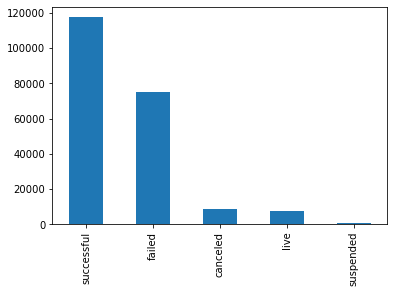

In [7]:
full_df.state.value_counts().plot(kind='bar');

Only states of interest are successful and failed. Canceled is unpredictiable, live is not known yet, and suspended is not enough data.\
__Remove__ canceled, live and suspended!

In [8]:
full_df = full_df.query('state != "live"').query('state != "suspended"').query('state != "canceled"')

## Check Currencies

In [9]:
full_df[['country', 'converted_pledged_amount', 'currency', 'current_currency', 'fx_rate', 'static_usd_rate', 'goal', 'pledged', 'usd_pledged', 'usd_type']].head(10)

,country,converted_pledged_amount,currency,current_currency,fx_rate,static_usd_rate,goal,pledged,usd_pledged,usd_type
1,US,1950,USD,USD,1.000000,1.000000,1000.0,1950.0,1950.000000,domestic
2,US,22404,USD,USD,1.000000,1.000000,15000.0,22404.0,22404.000000,international
3,GB,165,GBP,USD,1.308394,1.216066,10000.0,136.0,165.384934,domestic
4,US,2820,USD,USD,1.000000,1.000000,2800.0,2820.0,2820.000000,domestic
5,US,3725,USD,USD,1.000000,1.000000,3500.0,3725.0,3725.000000,domestic
6,US,3890,USD,USD,1.000000,1.000000,2500.0,3890.0,3890.000000,domestic
7,US,660,USD,USD,1.000000,1.000000,400.0,660.0,660.000000,international
8,GB,540,GBP,USD,1.308394,1.412765,375.0,375.0,529.786729,international
9,GB,2552,GBP,USD,1.308394,1.287697,380.0,1954.0,2516.160602,international
10,US,0,USD,USD,1.000000,1.000000,150000.0,0.0,0.000000,domestic


'converted_pledged_amount' is the amount of money in usd with fluctuations in fx rate taken into account, while 'usd_pledged' is the amount in usd calculated with last given rate.\
'usd_type' decides if only sold in country (domestic) or also shipped into other countries (international).

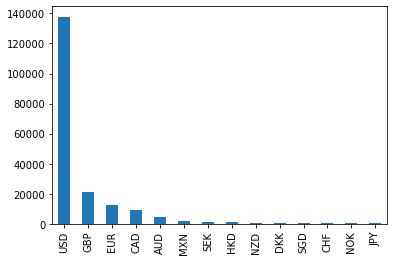

In [10]:
full_df.currency.value_counts().plot(kind='bar');

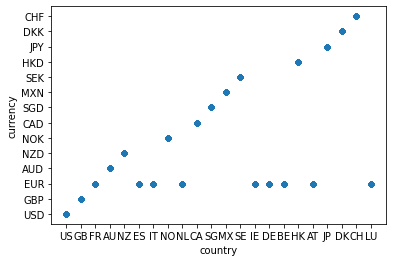

In [11]:
full_df.plot.scatter(x='country', y='currency');

## Overview

In [12]:
print('#### Kickstarter set ####')
print('# of observations: {}'.format(full_df.shape[0]))
print('# of features:         {}'.format(full_df.shape[1]))

#### Kickstarter set ####
# of observations: 192664
# of features:         37


In [13]:
# Missing Values
full_df.isna().sum()

backers_count                    0
blurb                            2
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     192664
fx_rate                          0
goal                             0
id                               0
is_backing                  192664
is_starrable                     0
is_starred                  192664
launched_at                      0
location                       215
name                             0
permissions                 192664
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

__remove__ friends, is_backing, is_starred, permissions because they have only NANs

In [14]:
full_df.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis=1, inplace=True)

In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 1 to 209221
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             192664 non-null  int64  
 1   blurb                     192662 non-null  object 
 2   category                  192664 non-null  object 
 3   converted_pledged_amount  192664 non-null  int64  
 4   country                   192664 non-null  object 
 5   created_at                192664 non-null  int64  
 6   creator                   192664 non-null  object 
 7   currency                  192664 non-null  object 
 8   currency_symbol           192664 non-null  object 
 9   currency_trailing_code    192664 non-null  bool   
 10  current_currency          192664 non-null  object 
 11  deadline                  192664 non-null  int64  
 12  disable_communication     192664 non-null  bool   
 13  fx_rate                   192664 non-null  f

## Check distributions of bools

In [16]:
print('## Disable communtication values ##')
print(full_df.disable_communication.value_counts())
full_df.drop('disable_communication', axis=1, inplace=True)

## Disable communtication values ##
False    192664
Name: disable_communication, dtype: int64


The data is too unbalanced, __remove__ feature!

In [17]:
print('## Is starrable values ##')
print(full_df.is_starrable.value_counts())
full_df.drop('is_starrable', axis=1, inplace=True)

## Is starrable values ##
False    192664
Name: is_starrable, dtype: int64


The data is too unbalanced, __remove__ feature!

In [18]:
print('## spotlight values ##')
print(full_df.spotlight.value_counts())

## spotlight values ##
True     117465
False     75199
Name: spotlight, dtype: int64


In [19]:
print('## staff_pick values ##')
print(full_df.staff_pick.value_counts())

## staff_pick values ##
False    166671
True      25993
Name: staff_pick, dtype: int64


In [20]:
print('## Compare name & slug ##')
print(full_df.name.values[0])
print(full_df.slug.values[0])
full_df.drop('name', axis=1, inplace=True)

## Compare name & slug ##
The Ofrenda Oracle Deck
the-ofrenda-oracle-deck


Same information in both features, slug is more python friendly, __remove__ name!

## Remove features

__Remove__ following features, because they are not of interest:
* creator
* currency_symbol
* currency_trailing_code
* id
* location
* photo
* profile
* source_url
* urls

In [21]:
full_df.drop(['creator', 'currency_symbol', 'currency_trailing_code', 'id', 'location', 'photo', 'profile', 'source_url', 'urls'], axis=1, inplace=True)

## Feature blurb
Turn explanation of project to word count of explanation.

In [22]:
expl = full_df.blurb.values

word_count = [len(str(i).split(' ')) for i in expl]

full_df['word_count'] = word_count

## Feature category
Grep name from category feature and use it as new category feature!

In [23]:
import json
# turn str to dict
to_dict = [json.loads(i) for i in full_df.category.values]
# get name entry
category = [i['slug'].split('/')[0] for i in to_dict]

full_df['category'] = category

In [24]:
full_df.category.unique()

array(['games', 'music', 'publishing', 'theater', 'fashion', 'food',
       'photography', 'art', 'technology', 'dance', 'design',
       'film & video', 'crafts', 'comics', 'journalism'], dtype=object)

## Date Features
Use datetime to convert full_date to eg:
* year, day, month (.year)
* duration: (time1-time2).days

In [25]:
from datetime import date
import datetime

full_df['deadline'] = [date.fromtimestamp(d) for d in full_df.deadline.values]
full_df['created_at'] = [date.fromtimestamp(d) for d in full_df.created_at.values]
full_df['launched_at'] = [date.fromtimestamp(d) for d in full_df.launched_at.values]
full_df['state_changed_at'] = [date.fromtimestamp(d) for d in full_df.state_changed_at.values]

## Remove final nans

In [26]:
# Missing Values
full_df.isna().sum()

backers_count                0
blurb                        2
category                     0
converted_pledged_amount     0
country                      0
created_at                   0
currency                     0
current_currency             0
deadline                     0
fx_rate                      0
goal                         0
launched_at                  0
pledged                      0
slug                         0
spotlight                    0
staff_pick                   0
state                        0
state_changed_at             0
static_usd_rate              0
usd_pledged                  0
usd_type                    38
word_count                   0
dtype: int64

Not many, just remove all entries.

In [27]:
full_df = full_df.dropna()

## Save data to new file

In [28]:
# Turn data to train and test set
from sklearn.model_selection import train_test_split

train, test = train_test_split(full_df, test_size=0.1, random_state=0)
print('## New Datasets ##')
print('# of obs in train set: {}'.format(train.shape[0]))
print('# of obs in test set:  {}'.format(test.shape[0]))
print('# of features:         {}'.format(train.shape[1]))

## New Datasets ##
# of obs in train set: 173361
# of obs in test set:  19263
# of features:         22


In [29]:
# save into three chunks (else size is too big for github)
for i, df_i in enumerate(np.array_split(train, 3)):
    df_i.to_csv('data/final/train/kickstarter_final_train_' + str(i) + '.csv', index=False)
for i, df_i in enumerate(np.array_split(test, 3)):
    df_i.to_csv('data/final/test/kickstarter_final_test_' + str(i) + '.csv', index=False)
for i, df_i in enumerate(np.array_split(full_df, 3)):
    df_i.to_csv('data/final/full/kickstarter_final_' + str(i) + '.csv', index=False)